# **탐구활동 1. 발견된 외계 행성계의 위치와 연도별로 발견된 외계 행성의 질량 나타내기**

# **1 데이터 수집 및 탐색**

## **1.1 데이터 수집**

### **1.1.1 패키지 라이브러리 불러오기**

In [1]:
!pip install pandas
!pip install astropy

In [2]:
# 패키지 라이브러리 불러오기
from google.colab import files # colab으로 파일 불러오기
import pandas as pd # 데이터 분석 패키지
import numpy as np # 수치 분석 패키지지
import matplotlib.pyplot as plt # 그래프 패키지
from mpl_toolkits.mplot3d import Axes3D # 3차원 그래프 모듈 
from astropy import units as u # 천문 단위 분석 패키지
from astropy.coordinates import SkyCoord # 천문 좌표게 분석 패키지

### **1.1.2 분석할 데이터 불러오기**

*   'exoplanet.eu_catalog_2022' 이라는 제목을 가진 csv 파일을 업로드 합니다.  







In [3]:
uploaded = files.upload()
df = pd.read_csv('exoplanet.eu_catalog_2022.csv') # 외계 행성 5284개 csv파일 불러오기

Saving exoplanet.eu_catalog_2022.csv to exoplanet.eu_catalog_2022.csv


## **1.2 데이터 기본 통계 정보**

### **1.2.1 전체 정보 확인하기**

*   분석하려는 외계 행성 데이터의 전체적인 정보를 확인합니다.
*   행(rows) 5284개, 열(columns) 98개를 가진 테이블 구조입니다. 

In [4]:
display(df) # 전체 데이터

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,NaN,NaN,NaN,16.1284,1.500,1.500,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,NaN,NaN,NaN,11.0873,1.100,1.100,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,NaN,NaN,NaN,4.6840,0.230,0.230,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,9.10,NaN,NaN,5.2150,NaN,NaN,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,ups And c,Confirmed,9.10,2.93,5.04,1.8000,0.260,0.260,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5280,ups And d,Confirmed,23.58,2.29,2.93,10.1900,NaN,NaN,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5281,ups And e,Confirmed,NaN,NaN,NaN,1.0590,0.028,0.028,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
5282,ups Leo b,Confirmed,NaN,NaN,NaN,0.5100,0.260,0.080,NaN,NaN,...,G9 III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **1.2.2 요약 정보 확인하기**

*   분석하려는 외계 행성 데이터의 요약 정보를 확인합니다.
*   각 열의 행 개수, 데이터 유형(type)을 확인합니다. (float64:실수형, object:문자형)

In [5]:
print(df.info()) # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   # name                      5284 non-null   object 
 1   planet_status               5284 non-null   object 
 2   mass                        1811 non-null   float64
 3   mass_error_min              1691 non-null   float64
 4   mass_error_max              1678 non-null   float64
 5   mass_sini                   1135 non-null   float64
 6   mass_sini_error_min         977 non-null    float64
 7   mass_sini_error_max         976 non-null    float64
 8   radius                      3839 non-null   float64
 9   radius_error_min            3683 non-null   float64
 10  radius_error_max            3683 non-null   float64
 11  orbital_period              4850 non-null   float64
 12  orbital_period_error_min    4614 non-null   float64
 13  orbital_period_error_max    4614 

### **1.2.3 기술 통계 확인하기**

*   분석하려는 외계 행성 파일의 기술 통계를 확인합니다.
*   각 열마다 데이터 개수(count), 평균(mean), 표준편차(std), 최소값(min), 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최고값(max)를 확인합니다.

In [6]:
print(df.describe()) # 기술 통계

              mass  mass_error_min  mass_error_max    mass_sini  \
count  1811.000000     1691.000000     1678.000000  1135.000000   
mean      6.425997             inf             inf     3.734487   
std      13.805865             NaN             NaN     7.873809   
min       0.000002        0.000000        0.000000     0.000104   
25%       0.050000        0.011465        0.009187     0.074629   
50%       0.727000        0.076000        0.070000     1.068000   
75%       4.030000        0.655000        0.600000     3.205000   
max     135.300000             inf             inf    63.300000   

       mass_sini_error_min  mass_sini_error_max       radius  \
count             977.0000             976.0000  3839.000000   
mean                   inf                  inf     0.433467   
std                    NaN                  NaN     0.493022   
min                 0.0000               0.0000     0.000002   
25%                 0.0088               0.0090     0.144250   
50%         

# **2 데이터 처리**

## **2.1 데이터 정제**

### **2.1.1 분석하고자 하는 열만 추출한 후 데이터 정보 확인하기**

*   98개의 열 중 적경(ra), 적위(dec), 발견된 해(discovered), 질량(mass), 항성까지 거리(star_distance, 지구로부터 외계 항성계까지) 열 4개만 분석에 사용하기 위해 추출합니다

In [7]:
df_e = df[['ra', 'dec', 'discovered', 'mass', 'star_distance']] # 적경, 적위, 발견된 해, 질량, 항성까지 거리 열만 추출
display('적경(ra), 적위(dec), 발견된 해(discovered), 질량(mass), 항성까지 거리(star_distance)', df_e) # 정보 확인

'적경(ra), 적위(dec), 발견된 해(discovered), 질량(mass), 항성까지 거리(star_distance)'

,ra,dec,discovered,mass,star_distance
0,185.179167,17.792778,2008.0,NaN,110.60
1,245.604167,-24.087222,2007.0,21.00,145.00
2,229.275000,71.823889,2009.0,NaN,119.50
3,352.820833,39.236111,2008.0,NaN,76.40
4,242.595833,43.821667,2002.0,9.10,18.10
...,...,...,...,...,...
5279,24.200000,41.410556,1999.0,9.10,13.47
5280,24.200000,41.410556,1999.0,23.58,13.47
5281,24.200000,41.410556,2010.0,NaN,13.47
5282,174.237500,-0.823611,2021.0,NaN,NaN


*    적경, 적위, 발견된 해, 질량, 항성까지 거리의 요약 정보를 확인합니다.
*    적경, 적위, 발견된 해, 질량, 항성까지 거리의 데이터가 각각 5284개, 5284개, 5276개, 1811개, 4976개 임을 확인합니다.

In [8]:
print(df_e.info()) # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ra             5284 non-null   float64
 1   dec            5284 non-null   float64
 2   discovered     5276 non-null   float64
 3   mass           1811 non-null   float64
 4   star_distance  4976 non-null   float64
dtypes: float64(5)
memory usage: 206.5 KB
None


### **2.1.2 결측값 확인 및 결측값 처리하기** 

*   적경, 적위, 발견된 해, 질량, 항성까지 거리의 결측값 개수가 각각 0개, 0개, 8개, 3473개, 308개 임을 확인합니다.

In [9]:
print('적경, 적위, 발견된 해, 질량, 항성까지 거리의 결측값 개수:', df_e.isnull().sum(), sep='\n') # 적경, 적위, 발견된 해, 질량별, 항성까지 거리의 결측값 합계

적경, 적위, 발견된 해, 질량, 항성까지 거리의 결측값 개수:
ra                  0
dec                 0
discovered          8
mass             3473
star_distance     308
dtype: int64


*   행을 기준으로 결측값을 모두 제거합니다.

In [10]:
df_e.dropna(axis='rows', inplace=True) # 행 기준 결측값 모두 제거

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


*   결측값이 제거된 결과를 확인합니다.
*   적경, 적위, 발견된 해, 질량, 항성까지 거리의 결측값이 모두 제거되어 0개가 되었고, 데이터 개수는 모두 1656개 임을 확인합니다. 

In [11]:
print(df_e.info(), sep='\n') # 요약 정보
print('-'*30) 
print('적경, 적위, 발견된 해, 질량, 항성까지 거리의 결측값 개수:', df_e.isnull().sum(), sep='\n') # 적경, 적위, 발견된 해, 질량, 항성까지의 거리별 결측값 합계

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 1 to 5283
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ra             1656 non-null   float64
 1   dec            1656 non-null   float64
 2   discovered     1656 non-null   float64
 3   mass           1656 non-null   float64
 4   star_distance  1656 non-null   float64
dtypes: float64(5)
memory usage: 77.6 KB
None
------------------------------
적경, 적위, 발견된 해, 질량, 항성까지 거리의 결측값 개수:
ra               0
dec              0
discovered       0
mass             0
star_distance    0
dtype: int64


## **2.2 데이터 변환**

### **2.2.1 ra, dec, discoverd, mass, star_distance 열을 각각 독립적인 열로 추출하기**

*    df_ex2 변수에 하나로 묶인 ra, dec, discoverd, mass, star_distance 열을 각각 독립적인 ra 열, dec 열, discovered 열, mass 열, star_distance 열로 추출합니다.

In [12]:
ra = df_e['ra'] # ra 열만 추출
dec = df_e['dec'] # dec 열만 추출
discovered = df_e['discovered'] # discovered 열만 추출
mass = df_e['mass']  # mass 열만 추출
star_distance = df_e['star_distance'] # star_distance 열만 추출

### **2.2.2 적도 좌표계를 카테시안 좌표계로 변환하기**

*   적도 좌표계(ra, dec)를 카테시안 좌표계(x, y, z)로 변환합니다.
*   SkyCoord는 astropy 라는 천문 전문 패키지의 함수로 좌표계간의 변환을 자동으로 해줍니다. 

In [13]:
x = [] # 아래에서 변환된 카테시안 x축 좌표값이 모이는 곳
y = [] # 아래에서 변환된 카테시안 y축 좌표값이 모이는 곳
z = [] # 아래에서 변환된 카테시안 z축 좌표값이 모이는 곳

for i in range (0, 1656): # 1656개 데이터에 대한 적도 좌표 -> 카테시안 자표 변환 
    c = SkyCoord(ra=ra.iloc[i]*u.degree, dec=dec.iloc[i]*u.degree, distance=star_distance.iloc[i]*u.kpc)
    x.append(c.cartesian.x.value) # 변환된 카테시안 x축값을 변수명 x에 붙여넣기
    y.append(c.cartesian.y.value) # 변환된 카테시안 y축값을 변수명 y에 붙여넣기
    z.append(c.cartesian.z.value) # 변환된 카테시안 z축값을 변수명 Z에 붙여넣기

x = np.round(x, 1) # 소수 첫째 자리까지 표현
y = np.round(y, 1) # 소수 첫째 자리까지 표현
z = np.round(z, 1) # 소수 첫째 자리까지 표현

print('카테시안 좌표 x, y, z:', x, y, z, sep='\n')

카테시안 좌표 x, y, z:
[-54.7  -6.   -6.  ...   9.2   9.2  40.9]
[-120.6  -11.6  -11.6 ...    4.1    4.1  -50.9]
[-59.2  12.5  12.5 ...   8.9   8.9  17.1]


# **3 데이터 분석**

## **3.1 데이터 시각화**

*   좌표 평면 그림에 카테시안 좌표 x, y, z를 변수로 한 외계행성 분포를 여러가지 기호 스타일, 범례를 사용해 표현합니다.

*   발견된 해와 외계행성 질량의 관계를 여러가지 기호 스타일 등을 사용해 표현합니다.

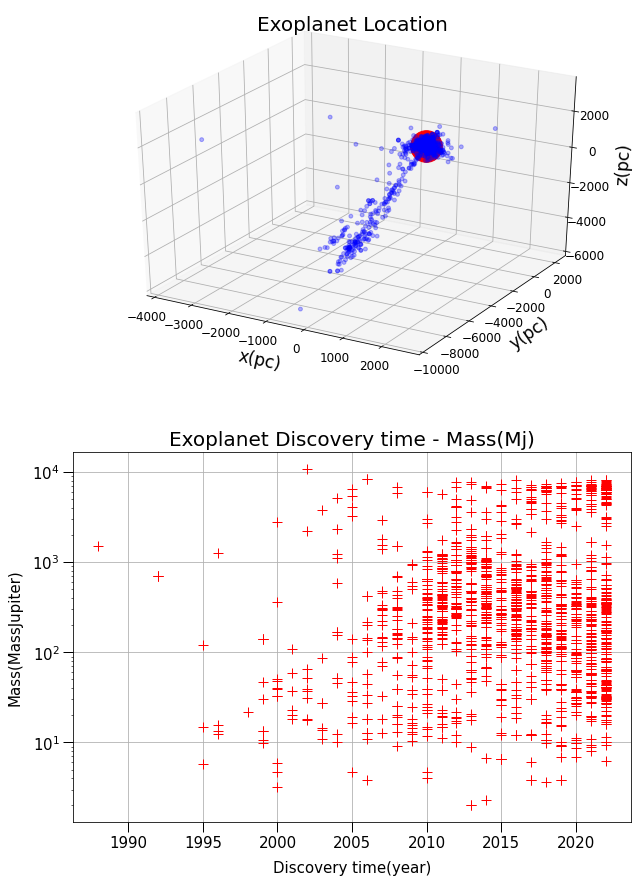

In [14]:
fig = plt.figure(figsize=(10,15)) # 그림 크기 지정
# 좌표 평면 그림에 각 기호 스타일(색깔, 크기, 레이블) 지정
ax1 = fig.add_subplot(211, projection='3d') # 1행 2열 첫 번째 3D 그림 생성
ax1.scatter(x,y,z, c='blue', marker='o', s=15, alpha=0.3) # 분산형 분포 생성 및 스타일(색깔, 모양, 크기, 투명도) 지정 - 외계 행성계 위치
ax1.scatter(0,0,0, c='red', marker='o', s=1000, alpha=1) # 분산형 분포 생성 및 스타일(색깔, 모양, 크기, 투명도) 지정 - 태양계 위치
ax1.set_xlabel('x(pc)', fontsize=17, labelpad=10) # x축 제목 스타일(크기, 패드) 지정
ax1.set_ylabel('y(pc)', fontsize=17, labelpad=10) # y축 제목 스타일(크기, 패드) 지정
ax1.set_zlabel('z(pc)', fontsize=17, labelpad=10) # z축 제목 스타일(크기, 패드) 지정
ax1.tick_params(labelsize=12, length=5, width=1) # 눈금 스타일(크기, 길이, 폭) 지정
ax1.set_title('Exoplanet Location', fontsize=20) # 제목 스타일(크기) 지정

ax2 = fig.add_subplot(212) # 1행 2열 두 번째 2D 그림 생성
ax2.plot(discovered, star_distance,'+', ms='10', mec='red', mfc='red') # 좌표 평면 기호 스타일 지정
ax2.set_xlabel('Discovery time(year)', fontsize=15, labelpad=10) # x축 제목 스타일(크기, 패드) 지정
ax2.set_ylabel('Mass(MassJupiter)', fontsize=15, labelpad=10) # y축 제목 스타일(크기, 패드) 지정
ax2.set_yscale('log') # y축 스케일 로그로 지정
ax2.tick_params(labelsize=15, length=10, width=1) # 눈금 스타일(크기, 길이, 폭) 지정
ax2.set_title('Exoplanet Discovery time - Mass(Mj)', fontsize=20) # 제목 스타일(크기) 지정
ax2.grid() # 격자 생성
plt.show() # 시각화

# **탐구활동 2. 외계 행성의 공전궤도 중 장축반경과 외계 행성의 질량 간의 관계를 탐사 방법과 관련하여 나타내기**

*   ## **데이터 수집 및 탐색은 탐구활동 1에서 하였기에 생략합니다.**


# **2 데이터 처리**

## **2.1 데이터 정제**

### **23.1.1 분석하고자 하는 열만 추출한 후 데이터 정보 확인하기**



*   96개의 열 중 탐사유형(detection_type), 장축반경(semi_major_axis, 해당 외계 행성의 공전궤도 중 장축반경), 질량(mass, 목성 질량 대비 몇 배 인지가 기준) 열 3개만 분석에 사용하기 위해 추출합니다.



In [15]:
df_ex = df[['detection_type', 'semi_major_axis', 'mass']] # 탐사유형, 장축반경, 질량 열만 추출
display('탐사유형(detection_type), 장축반경(semi_major_axis), 질량(mass)', df_ex) # 정보 확인

'탐사유형(detection_type), 장축반경(semi_major_axis), 질량(mass)'

,detection_type,semi_major_axis,mass
0,Radial Velocity,1.2900,NaN
1,Imaging,243.0000,21.00
2,Radial Velocity,1.5400,NaN
3,Radial Velocity,0.8300,NaN
4,Radial Velocity,2.8450,9.10
...,...,...,...
5279,Radial Velocity,0.8610,9.10
5280,Radial Velocity,2.5500,23.58
5281,Radial Velocity,5.2456,NaN
5282,Radial Velocity,1.1800,NaN




*    탐사 유형, 장축 반경, 질량의 요약 정보를 확인합니다.
*    탐사 유형, 장축 반경, 질량의 데이터가 각각 5284개, 3564개, 1811개 임을 확인합니다.


In [16]:
print(df_ex.info()) # 요약 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   detection_type   5284 non-null   object 
 1   semi_major_axis  3564 non-null   float64
 2   mass             1811 non-null   float64
dtypes: float64(2), object(1)
memory usage: 124.0+ KB
None


### **2.1.2 결측값 확인 및 결측값 처리하기** 

*   탐사유형, 장축반경, 질량의 결측값 개수가 각각 0개, 1720개, 3473개 임을 확인합니다.

In [17]:
print('탐사유형, 장축반경, 질량의 결측값 개수:', df_ex.isnull().sum(), sep='\n') # 탐사유형, 장축반경, 질량별 결측값 합계

탐사유형, 장축반경, 질량의 결측값 개수:
detection_type        0
semi_major_axis    1720
mass               3473
dtype: int64




*   행을 기준으로 결측값을 모두 제거합니다.



In [18]:
df_ex.dropna(axis='rows', inplace=True) # 행 기준 결측값 모두 제거

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)




*   결측값이 제거된 결과를 확인합니다.
*   탐사유형, 장축반경, 질량의 결측값이 모두 제거되어 0개가 되었고, 데이터 개수는 모두 1542개 임을 확인합니다. 




In [19]:
print(df_ex.info(), sep='\n') # 요약 정보
print('-'*30) 
print('탐사유형, 장축반경, 질량의 결측값 개수:', df_ex.isnull().sum(), sep='\n') # 탐사유형, 장축반경, 질량별 결측값 합계

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 1 to 5283
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   detection_type   1542 non-null   object 
 1   semi_major_axis  1542 non-null   float64
 2   mass             1542 non-null   float64
dtypes: float64(2), object(1)
memory usage: 48.2+ KB
None
------------------------------
탐사유형, 장축반경, 질량의 결측값 개수:
detection_type     0
semi_major_axis    0
mass               0
dtype: int64


## **2.2 데이터 변환**

### **2.2.1 탐사유형 열의 데이터 정보 확인하기**



*   탐사유형별 열의 요약 정보를 확인합니다.
*   탐사유형의 종류가 총 8가지 임을 확인합니다.



In [20]:
print('탐사유형 종류:', df_ex['detection_type'].unique(), sep='\n') # 탐사유형 종류(중복 없이)
print('탐사유형 종류 개수:', df_ex['detection_type'].unique().size) # 탐사유형 종류 개수(중복없이)
print('탐사유형 종류별 개수:', df_ex.groupby(['detection_type'])['detection_type'].count(), sep='\n') # 탐사유형 종류별 개수(중복없이)
print('-'*50)
print('탐사유형', df_ex['detection_type'], sep='\n') # 탐사유형 전체 정보

탐사유형 종류:
['Imaging' 'Radial Velocity' 'Astrometry' 'Primary Transit' 'Default'
 'Microlensing' 'Timing' 'TTV']
탐사유형 종류 개수: 8
탐사유형 종류별 개수:
detection_type
Astrometry           13
Default              20
Imaging             127
Microlensing        211
Primary Transit    1059
Radial Velocity      84
TTV                  10
Timing               18
Name: detection_type, dtype: int64
--------------------------------------------------
탐사유형
1               Imaging
4       Radial Velocity
5       Radial Velocity
9               Imaging
10              Imaging
             ...       
5272    Radial Velocity
5278    Radial Velocity
5279    Radial Velocity
5280    Radial Velocity
5283            Imaging
Name: detection_type, Length: 1542, dtype: object


### **2.2.2 분석에 필요없는 데이터 삭제하기**


*   탐사유형 중 비상 지구과학 교과서에서는 직접촬영(Imaging), 미세 중력 렌즈 현상(icrolensing), 도플러 효과(Radial Velocity), 식현상(Primary Transit)만을 다루고 있습니다.
*   따라서 Astrometry, Default, TTV, Timing은 분석에 필요없기에 모두 삭제합니다.



In [21]:
df_ex.drop(index = df_ex[df_ex['detection_type'] == 'Astrometry'].index, inplace=True) # 탐사유형 중 Astrometry은 모두 제거
df_ex.drop(index = df_ex[df_ex['detection_type'] == 'Default'].index, inplace=True) # 탐사유형 중 Default은 모두 제거
df_ex.drop(index = df_ex[df_ex['detection_type'] == 'TTV'].index, inplace=True) # 탐사유형 중 TTV은 모두 제거
df_ex.drop(index = df_ex[df_ex['detection_type'] == 'Timing'].index, inplace=True) # 탐사유형 중 Timing은 모두 제거

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(




*   탐사유형의 종류가 4가지로 줄어든 것을 확인합니다.



In [22]:
print('탐사유형 종류:', df_ex['detection_type'].unique(), sep='\n') # 탐사유형 종류(중복 없이)
print('탐사유형 종류 개수:', df_ex['detection_type'].unique().size) # 탐사유형 종류 개수(중복없이)
print('탐사유형 종류별 개수:', df_ex.groupby(['detection_type'])['detection_type'].count(), sep='\n') # 탐사유형 종류별 개수(중복없이)
print('-'*50)
print('탐사유형', df_ex['detection_type'], sep='\n') # 탐사유형 전체 정보

탐사유형 종류:
['Imaging' 'Radial Velocity' 'Primary Transit' 'Microlensing']
탐사유형 종류 개수: 4
탐사유형 종류별 개수:
detection_type
Imaging             127
Microlensing        211
Primary Transit    1059
Radial Velocity      84
Name: detection_type, dtype: int64
--------------------------------------------------
탐사유형
1               Imaging
4       Radial Velocity
5       Radial Velocity
9               Imaging
10              Imaging
             ...       
5272    Radial Velocity
5278    Radial Velocity
5279    Radial Velocity
5280    Radial Velocity
5283            Imaging
Name: detection_type, Length: 1481, dtype: object


### **2.2.3 컴퓨터가 분석을 할 수 있도록 데이터 변환하기**



*   탐사유형 중 직접촬영(Imaging) -> 0, 미세 중력 렌즈 현상(Microlensing) -> 1, 도플러 효과(Radial Velocity) -> 2, 식현상(Primary Transit) -> 3 으로 변경합니다.




In [23]:
# 탐사유형 중 직접촬영(Imaging) -> 0, 미세 중력 렌즈 현상(Microlensing) -> 1, 도플러 효과(Radial Velocity) -> 2, 식현상(Primary Transit) -> 3 으로 변경
df_ex['detection_type'] = df_ex['detection_type'].replace('Imaging', 0).replace('Microlensing', 1).replace('Radial Velocity', 2).replace('Primary Transit', 3)
print('탐사유형 종류별 개수:', df_ex.groupby(['detection_type'])['detection_type'].count(), sep='\n') # 탐사유형 종류별 개수

탐사유형 종류별 개수:
detection_type
0     127
1     211
2      84
3    1059
Name: detection_type, dtype: int64


<ipython-input-23-89ac1e85f2d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex['detection_type'] = df_ex['detection_type'].replace('Imaging', 0).replace('Microlensing', 1).replace('Radial Velocity', 2).replace('Primary Transit', 3)


### **2.2.4 탐사유형별 장축반경과 질량 분리하기**



*   탐사유형이 0, 1, 2, 3일 때 장축반경과 질량을 분리합니다.
*   데이터 분석의 시각화 단계에서 장축 반경과 질량을 기준으로로 탐사유형별 분포를 나타내기 위함입니다. 


In [24]:
df_ex_0_s =  df_ex[df_ex['detection_type'] == 0]['semi_major_axis'] # 탐사유형이 0일때의 장축반경값을 df_ex_0_s 라는 변수에 저장
df_ex_0_m =  df_ex[df_ex['detection_type'] == 0]['mass'] # 탐사유형이 0일때의 질량값을 df_ex_0_m 이라는 변수에 저장
df_ex_1_s =  df_ex[df_ex['detection_type'] == 1]['semi_major_axis'] # 탐사유형이 1일때의 장축반경값을 df_ex_1_s 라는 변수에 저장
df_ex_1_m =  df_ex[df_ex['detection_type'] == 1]['mass'] # 탐사유형이 1일때의 질량값을 df_ex_1_m 이라는 변수에 저장
df_ex_2_s =  df_ex[df_ex['detection_type'] == 2]['semi_major_axis'] # 탐사유형이 2일때의 장축반경값을 df_ex_2_s 라는 변수에 저장
df_ex_2_m =  df_ex[df_ex['detection_type'] == 2]['mass'] # 탐사유형이 2일때의 질량값을 df_ex_2_m 이라는 변수에 저장
df_ex_3_s =  df_ex[df_ex['detection_type'] == 3]['semi_major_axis'] # 탐사유형이 3일때의 장축반경값을 df_ex_3_s 라는 변수에 저장
df_ex_3_m =  df_ex[df_ex['detection_type'] == 3]['mass'] # 탐사유형이 3일때의 질량값을 df_ex_3_m 이라는 변수에 저장

# **3 데이터 분석**

## **3.1 데이터 시각화**



*   좌표 평면 그림에 장축 반경과 질량을 변수로 한 탐사유형별 분포를 여러가지 기호 스타일, 범례를 사용해 표현합니다.



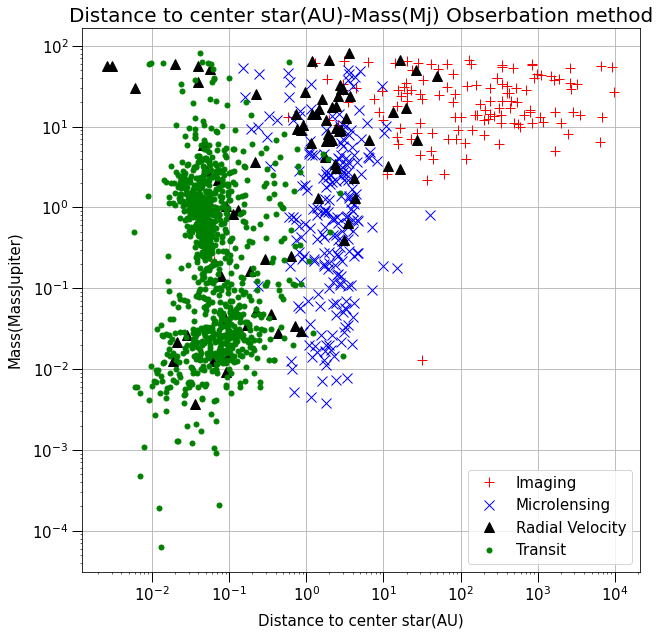

In [25]:
plt.figure(figsize=(10,10)) # 그림 크기 지정
# 좌표 평면 그림에 각 기호 스타일(색깔, 크기, 레이블) 지정
plt.plot(df_ex_0_s, df_ex_0_m, '+', ms='10', mec='red', mfc='red', label='Imaging') # 탐사유형이 0(Imaging)일때의 장축 반경과 질량 그래프
plt.plot(df_ex_1_s, df_ex_1_m, 'x', ms='10', mec='blue', mfc='blue', label='Microlensing') # 탐사유형이 1(Microlensing)일때의 장축 반경과 질량 그래프
plt.plot(df_ex_2_s, df_ex_2_m, '^', ms='10', mec='black', mfc='black', label='Radial Velocity') # 탐사유형이 2(Radial Velocity)일때의 장축 반경과 질량 그래프
plt.plot(df_ex_3_s, df_ex_3_m, '.', ms='10', mec='green', mfc='green', label='Transit') # 탐사유형이 3(Primary Transit)일때의 장축 반경과 질량 그래프
plt.xlabel('Distance to center star(AU)', fontsize=15, labelpad=10) # x축 제목 스타일(크기, 패드) 지정
plt.ylabel('Mass(MassJupiter)', fontsize = 15, labelpad=10) # y축 제목 스타일(크기, 패드) 지정
plt.xscale('log') # x축 스케일 로그로 지정
plt.yscale('log') # y축 스케일 로그로 지정
plt.tick_params(labelsize=15, length=10, width=1) # 눈금 스타일(크기, 길이, 폭) 지정
plt.legend(loc='best', fontsize=15) # 범례 스타일(위치, 크기) 지정
plt.title('Distance to center star(AU)-Mass(Mj) Obserbation method',  fontsize=20) # 제목 스타일(크기) 지정
plt.grid() # 격자 생성
plt.show() # 시각화